In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from bandit import run_experiment


In [9]:
# Set up the experiment parameters
num_runs = 2000
num_steps = 10000

algorithms = {
    'Sample Average': ('sample_average', None, 0.1, False, False),
    'Constant Step-Size': ('constant_step', 0.1, 0.1, False, False),
    'Gradient sample average': ('gradient', 0.1, None, True, True),
    'Gradient constant step-size': ('gradient', 0.1, None, True, False),
    'UCB c=0.5': ('ucb', 0.1, None, False, False, 0.5),
    'UCB c=1.0': ('ucb', 0.1, None, False, False, 1.0),
    'UCB c=2.0': ('ucb', 0.1, None, False, False, 2.0),
    'UCB c=4.0': ('ucb', 0.1, None, False, False, 4.0)
}


In [10]:
# Run the experiments
results = {}

start_time = time.time()

for name, params in algorithms.items():
    print(f"Running {name}...")
    rewards_list = []
    optimal_list = []
    for i in range(num_runs):
        if i % 100 == 0:
            print(f"  Run {i}/{num_runs}")
        rewards, optimal_actions, chosen_actions = run_experiment(num_steps, *params)
        rewards_list.append(rewards)
        optimal_list.append(optimal_actions == chosen_actions)
    results[name] = {
        'rewards': np.array(rewards_list),
        'optimal': np.array(optimal_list)
    }
    print(f"Finished {name}")

end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")

Running Sample Average...
  Run 0/2000
  Run 100/2000
  Run 200/2000
  Run 300/2000
  Run 400/2000
  Run 500/2000
  Run 600/2000
  Run 700/2000
  Run 800/2000
  Run 900/2000
  Run 1000/2000
  Run 1100/2000
  Run 1200/2000
  Run 1300/2000
  Run 1400/2000
  Run 1500/2000
  Run 1600/2000
  Run 1700/2000
  Run 1800/2000
  Run 1900/2000
Finished Sample Average
Running Constant Step-Size...
  Run 0/2000
  Run 100/2000
  Run 200/2000
  Run 300/2000
  Run 400/2000
  Run 500/2000
  Run 600/2000
  Run 700/2000
  Run 800/2000
  Run 900/2000
  Run 1000/2000
  Run 1100/2000
  Run 1200/2000
  Run 1300/2000
  Run 1400/2000
  Run 1500/2000
  Run 1600/2000
  Run 1700/2000
  Run 1800/2000
  Run 1900/2000
Finished Constant Step-Size
Running Gradient sample average...
  Run 0/2000
  Run 100/2000
  Run 200/2000
  Run 300/2000
  Run 400/2000
  Run 500/2000
  Run 600/2000
  Run 700/2000
  Run 800/2000
  Run 900/2000
  Run 1000/2000
  Run 1100/2000
  Run 1200/2000
  Run 1300/2000
  Run 1400/2000
  Run 1500/20

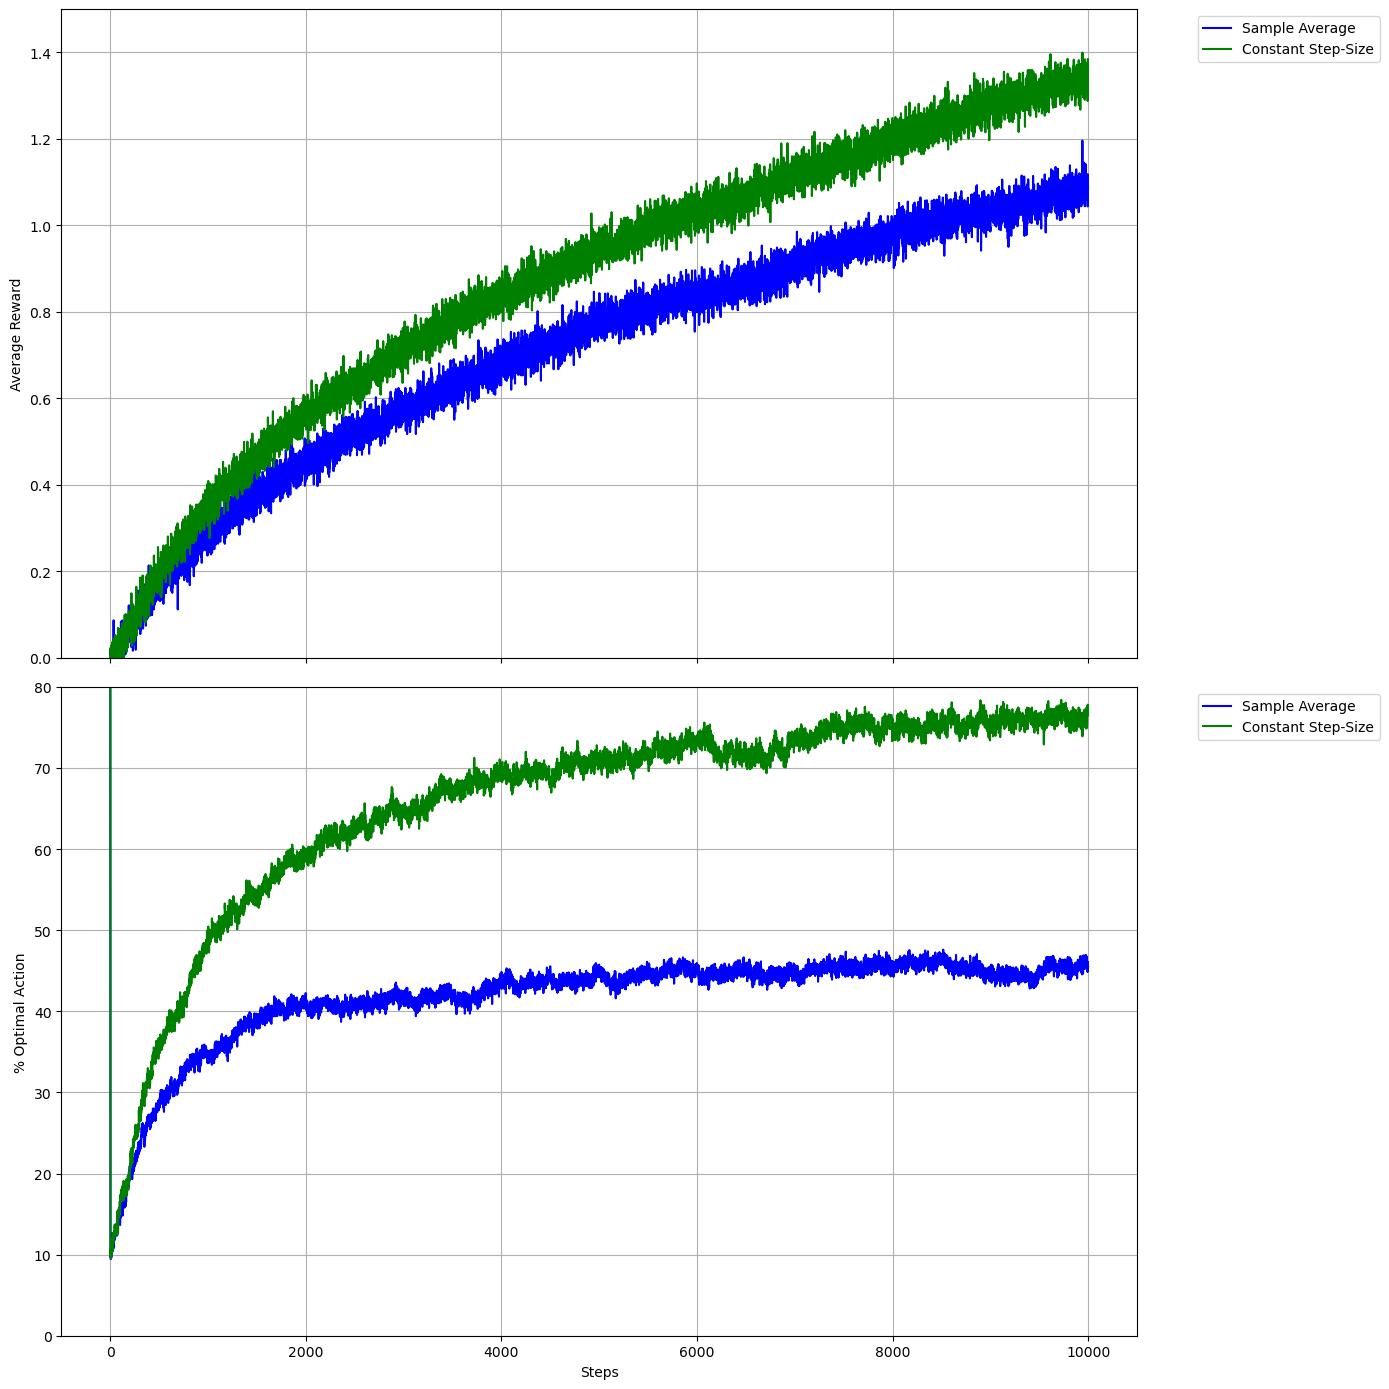

In [18]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

algorithms_to_plot = {
    'Sample Average': ('sample_average', None, 0.1, False, False),
    'Constant Step-Size': ('constant_step', 0.1, 0.1, False, False),
}

colors = {
    'Sample Average': 'blue',
    'Constant Step-Size': 'green',
}

# Average Reward plot
for name in algorithms_to_plot:
    avg_reward = np.mean(results[name]['rewards'], axis=0)
    ax1.plot(avg_reward, label=name, color=colors[name])

ax1.set_ylabel('Average Reward')
ax1.set_ylim(0, 1.5)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Percentage of Optimal Action plot
for name in algorithms_to_plot:
    pct_optimal = np.mean(results[name]['optimal'], axis=0) * 100
    ax2.plot(pct_optimal, label=name, color=colors[name])

ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.set_ylim(0, 80)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

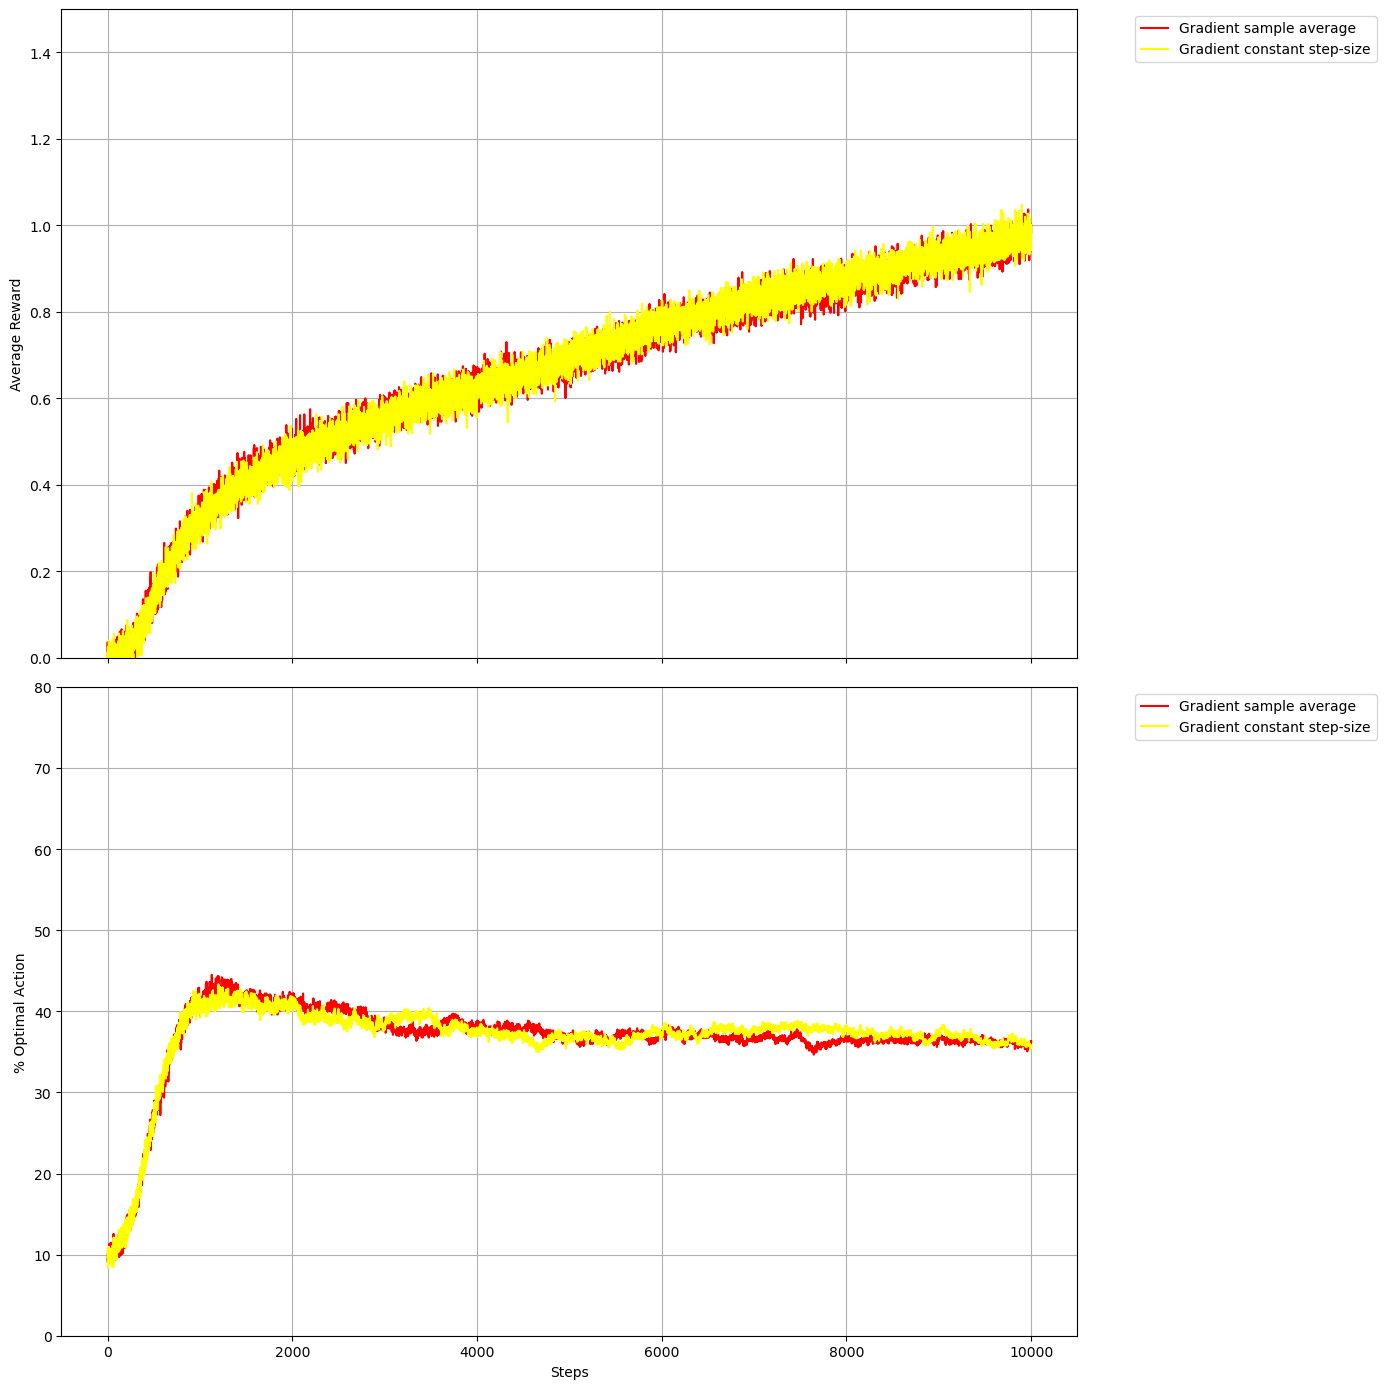

In [19]:

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

algorithms_to_plot = {
    'Gradient sample average': ('gradient', 0.1, None, True, True),
    'Gradient constant step-size': ('gradient', 0.1, None, True, False),
}
colors = {
    'Gradient sample average': 'red',
    'Gradient constant step-size': 'yellow',
}

# Average Reward plot
for name in algorithms_to_plot:
    avg_reward = np.mean(results[name]['rewards'], axis=0)
    ax1.plot(avg_reward, label=name, color=colors[name])

ax1.set_ylabel('Average Reward')
ax1.set_ylim(0, 1.5)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Percentage of Optimal Action plot
for name in algorithms_to_plot:
    pct_optimal = np.mean(results[name]['optimal'], axis=0) * 100
    ax2.plot(pct_optimal, label=name, color=colors[name])

ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.set_ylim(0, 80)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

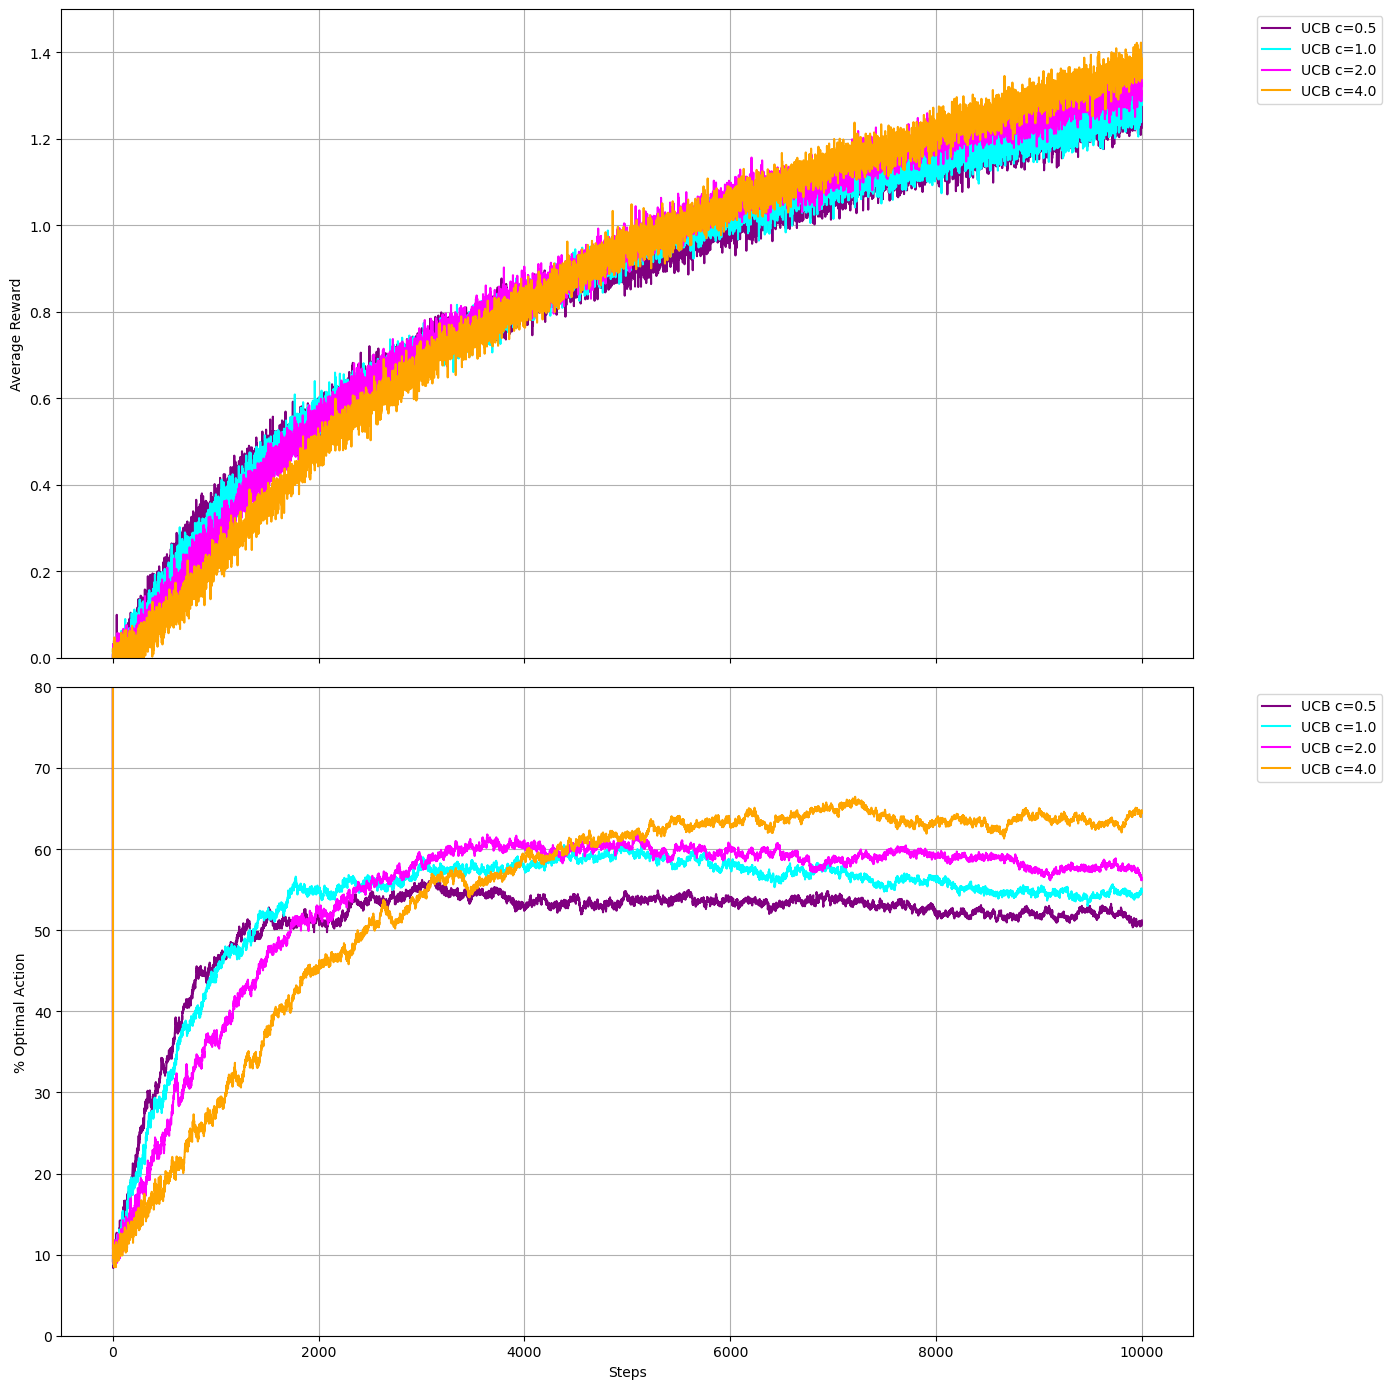

In [20]:

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

algorithms_to_plot = {
    'UCB c=0.5': ('ucb', 0.1, None, False, False, 0.5),
    'UCB c=1.0': ('ucb', 0.1, None, False, False, 1.0),
    'UCB c=2.0': ('ucb', 0.1, None, False, False, 2.0),
    'UCB c=4.0': ('ucb', 0.1, None, False, False, 4.0)
}
colors = {
    'UCB c=0.5': 'purple',
    'UCB c=1.0': 'cyan',
    'UCB c=2.0': 'magenta',
    'UCB c=4.0': 'orange'
}

# Average Reward plot
for name in algorithms:
    avg_reward = np.mean(results[name]['rewards'], axis=0)
    ax1.plot(avg_reward, label=name, color=colors[name])

ax1.set_ylabel('Average Reward')
ax1.set_ylim(0, 1.5)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Percentage of Optimal Action plot
for name in algorithms:
    pct_optimal = np.mean(results[name]['optimal'], axis=0) * 100
    ax2.plot(pct_optimal, label=name, color=colors[name])

ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.set_ylim(0, 80)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

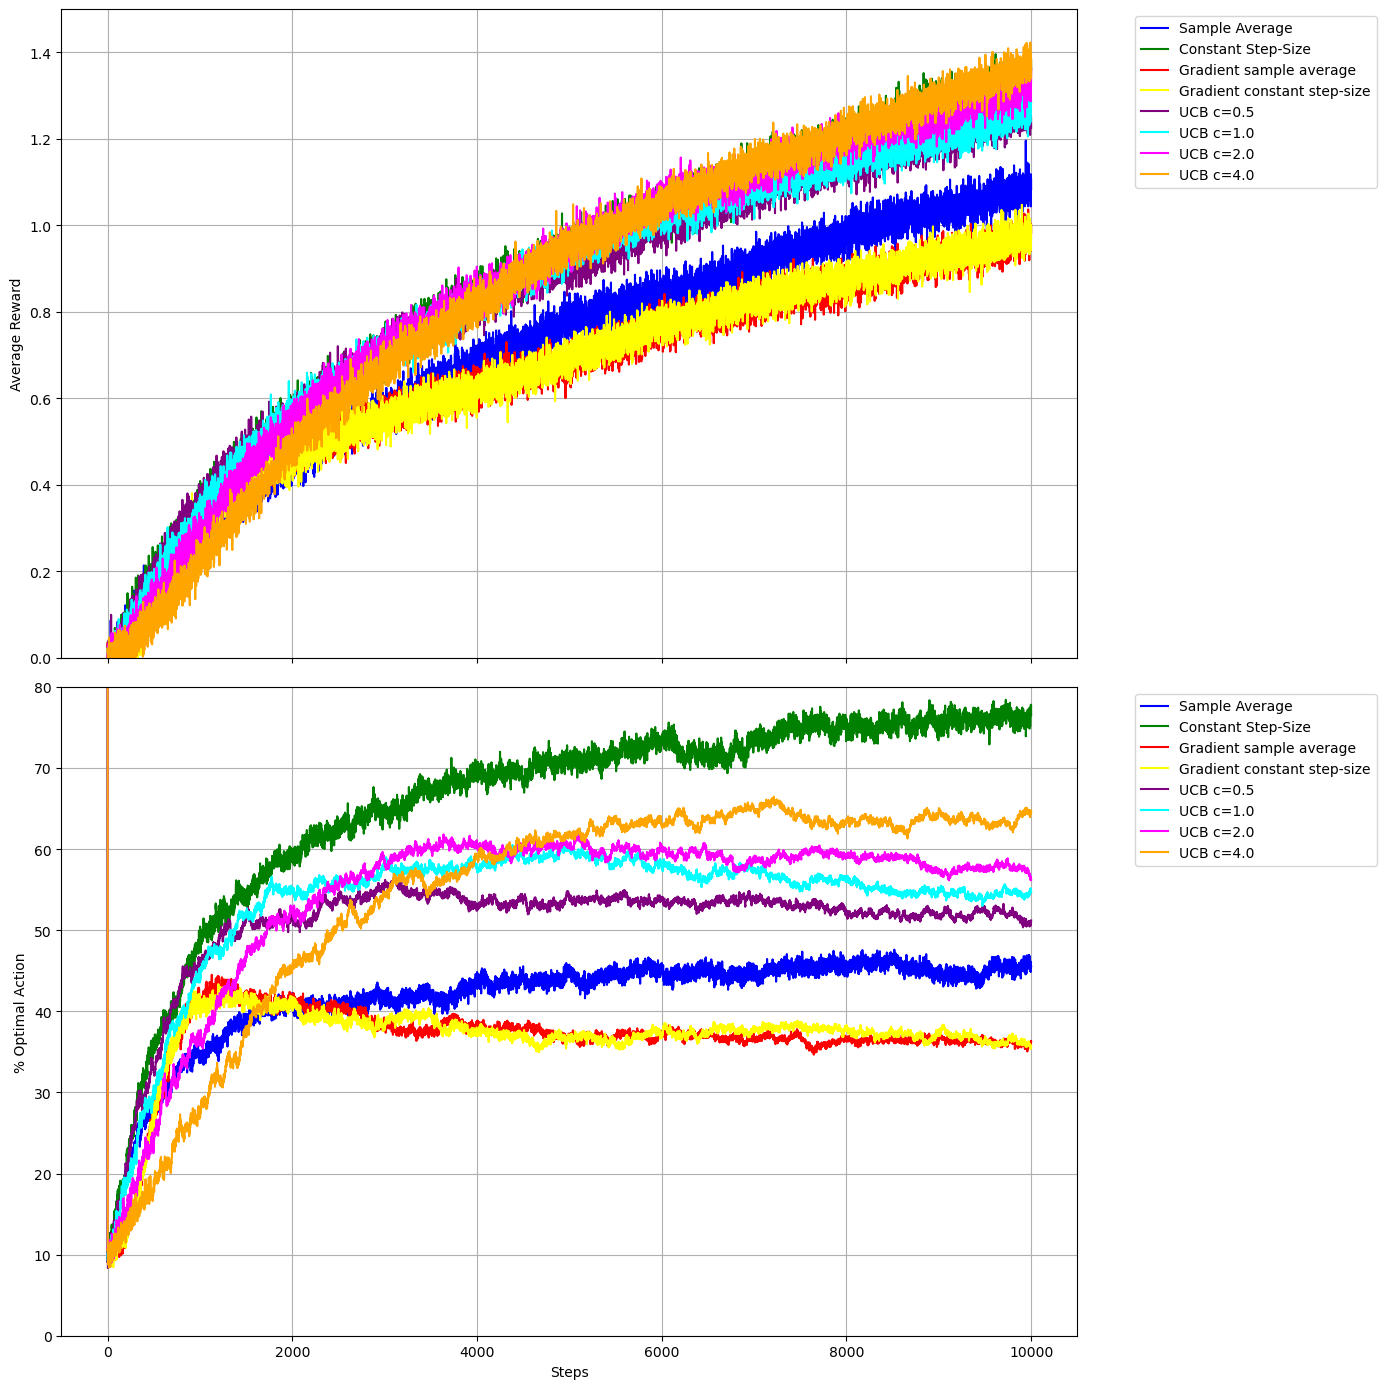

In [21]:


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

algorithms_to_plot = {
    'Sample Average': ('sample_average', None, 0.1, False, False),
    'Constant Step-Size': ('constant_step', 0.1, 0.1, False, False),
    'Gradient sample average': ('gradient', 0.1, None, True, True),
    'Gradient constant step-size': ('gradient', 0.1, None, True, False),
    'UCB c=0.5': ('ucb', 0.1, None, False, False, 0.5),
    'UCB c=1.0': ('ucb', 0.1, None, False, False, 1.0),
    'UCB c=2.0': ('ucb', 0.1, None, False, False, 2.0),
    'UCB c=4.0': ('ucb', 0.1, None, False, False, 4.0)
}
colors = {
    'Sample Average': 'blue',
    'Constant Step-Size': 'green',
    'Gradient sample average': 'red',
    'Gradient constant step-size': 'yellow',
    'UCB c=0.5': 'purple',
    'UCB c=1.0': 'cyan',
    'UCB c=2.0': 'magenta',
    'UCB c=4.0': 'orange'
}

# Average Reward plot
for name in algorithms:
    avg_reward = np.mean(results[name]['rewards'], axis=0)
    ax1.plot(avg_reward, label=name, color=colors[name])

ax1.set_ylabel('Average Reward')
ax1.set_ylim(0, 1.5)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Percentage of Optimal Action plot
for name in algorithms:
    pct_optimal = np.mean(results[name]['optimal'], axis=0) * 100
    ax2.plot(pct_optimal, label=name, color=colors[name])

ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.set_ylim(0, 80)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()